# Decision Tree 🌳

คือ อัลกอริธึมการเรียนรู้ของเครื่องที่ใช้สำหรับการทำนายหรือการตัดสินใจ โดยการแบ่งข้อมูลออกเป็นหลาย ๆ ส่วนตามกฎเกณฑ์ที่ตั้งขึ้น (เช่น "อายุ > 30 ปี หรือไม่?") เพื่อให้ได้ผลลัพธ์ที่ชัดเจน 🌟
- ใช้กฎการตัดสินใจแบบ If-Else เพื่อแบ่งข้อมูล 🌱
- ผลลัพธ์จะถูกแสดงในรูปของต้นไม้ที่แต่ละกิ่งแสดงการตัดสินใจ 🏞️
- ทำงานได้ดีทั้งกับข้อมูลเชิงปริมาณและเชิงคุณภาพ 📊

ง่าย ๆ ก็คือเหมือนการตั้งคำถามซึ่งกันและกันเพื่อหาคำตอบที่ถูกต้องที่สุด เช่น ถามคำถามไปเรื่อย ๆ จนได้คำตอบที่ชัดเจน 🎯

### 1. Import Library
    - pandas, numpy 📊: จัดการข้อมูล
    - seaborn, matplotlib 📈: สร้างกราฟ
    - sklearn 🧑‍💻: สร้างโมเดลและประเมินผล เช่น train_test_split, StandardScaler, mean_squared_error

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 2. Load data

In [2]:
DATA_PATH = os.path.join("..", "DataSet", "Air_quality_cleaned_v1.csv")
df = pd.read_csv(DATA_PATH)
df.columns

Index(['Report time', 'Date', 'Time', 'Device ID', 'AQI', 'Temp', 'Humidity',
       'PM2.5', 'VOC', 'CO2', 'HCHO', 'Device type', 'Project', 'Data type',
       'Asset number', 'Asset name', 'System', 'Install location'],
      dtype='object')

### 3. เลือกคอลัมน์

In [3]:
df = df[['Date', 'Time', 'Temp', 'Humidity','PM2.5', 'VOC', 'CO2', 'HCHO']]

### 4. จัดการ Missing Values (กรณีบางค่าอาจหายไปในบางแถว)

In [4]:
print(df.dtypes)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.isnull().sum())

Date         object
Time         object
Temp        float64
Humidity    float64
PM2.5         int64
VOC         float64
CO2           int64
HCHO        float64
dtype: object
Date        0
Time        0
Temp        0
Humidity    0
PM2.5       0
VOC         0
CO2         0
HCHO        0
dtype: int64


### 5.  เลือก Features และ Target

In [5]:
X = df[['PM2.5', 'VOC', 'Temp', 'Humidity', 'HCHO']]  # Feature
y = df['CO2']  # Target

### 6. แบ่งข้อมูลเป็น Train และ Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 7. Scaling ข้อมูล

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 8. Train Random Forest Model

In [8]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

### 9. ทำนายผล

In [9]:
y_pred_train = dt.predict(X_train_scaled)  # ทำนายข้อมูล train
y_pred_test = dt.predict(X_test_scaled)  # ทำนายข้อมูล test

### 10. วัดผล Model

In [11]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training Metrics:")
print(f"MSE: {mse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2%}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2%}")

Training Metrics:
MSE: 0.09
MAE: 0.06
R-squared: 100.00%

Testing Metrics:
MSE: 108.57
MAE: 4.80
R-squared: 93.05%


### 11. วิเคราะห์ Feature Importance

C:\Users\WIN 10 PRO 22H2\AppData\Local\Temp\ipykernel_7584\991198115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


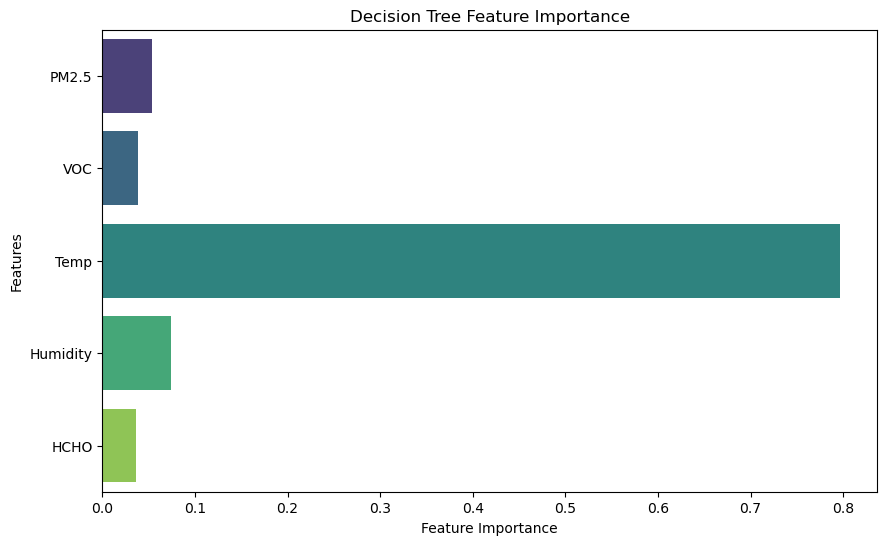

In [12]:
feature_importance = dt.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.show()

### 12. ตรวจสอบ Underfitting และ Overfitting

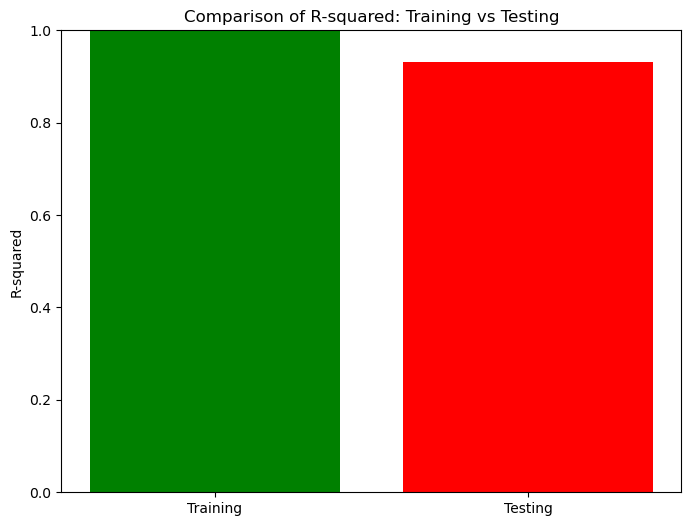

In [13]:
train_r2 = r2_train
test_r2 = r2_test

# สร้างกราฟเปรียบเทียบ R-squared
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['green', 'red'])
plt.ylim(0, 1)
plt.title('Comparison of R-squared: Training vs Testing')
plt.ylabel('R-squared')
plt.show()

In [14]:
print("\nModel Evaluation:")
if r2_train > 0.95 and r2_test < 0.8:
    print("Overfitting: Model performs very well on training data but poorly on test data.")
elif r2_train < 0.7 and r2_test < 0.7:
    print("Underfitting: Model performs poorly on both training and test data.")
else:
    print("Model performance is reasonable.")


Model Evaluation:
Model performance is reasonable.


### 13. วิเคราะห์ Residuals (ส่วนต่างระหว่างค่าจริงกับค่าที่ทำนาย)

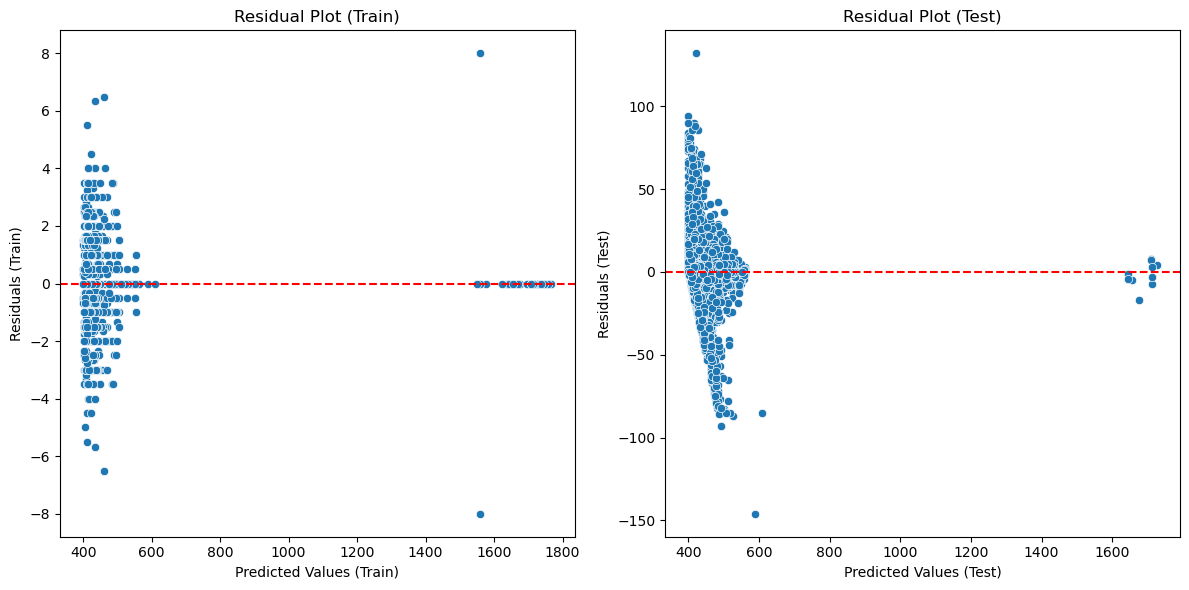

In [15]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_train, y=residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Residual Plot (Train)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_test, y=residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Residual Plot (Test)")

plt.tight_layout()
plt.show()

### 14. Histogram of Residuals

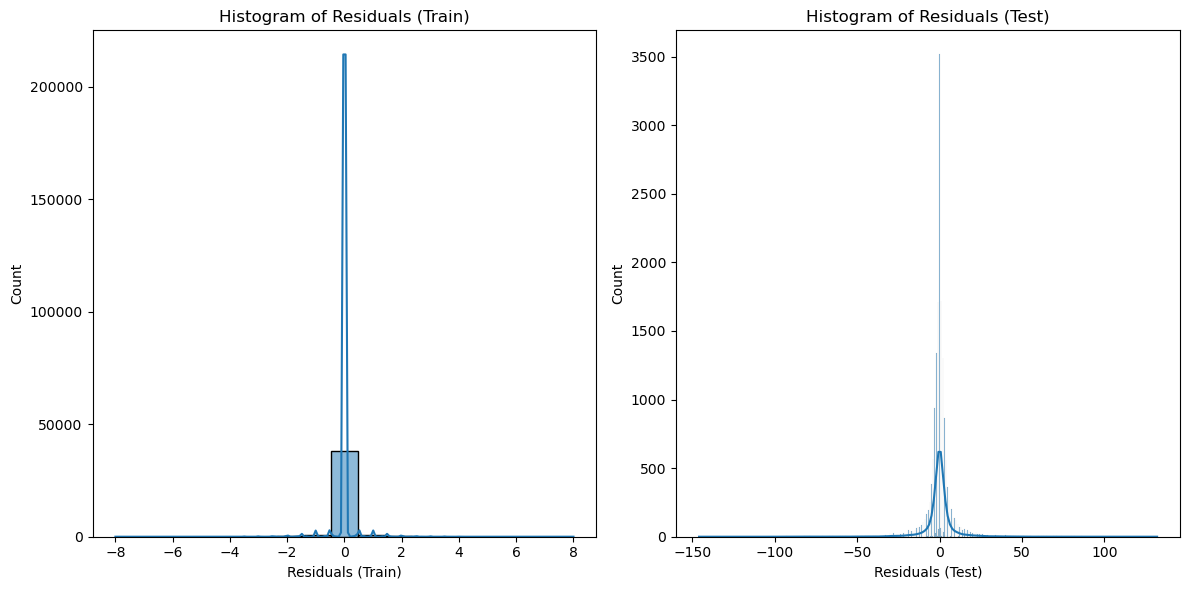

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_train, kde=True)
plt.xlabel("Residuals (Train)")
plt.title("Histogram of Residuals (Train)")

plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True)
plt.xlabel("Residuals (Test)")
plt.title("Histogram of Residuals (Test)")

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score

# 18. Cross-validation to assess the model's performance
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")

# Calculate and print the mean of cross-validation scores
mean_cv_score = np.mean(cv_scores)
print(f"Mean cross-validation score: {mean_cv_score:.4f}")


Cross-validation scores: [0.93867751 0.8576231  0.94884647 0.92701997 0.92882387]
Mean cross-validation score: 0.9202


### 15. ทำนายค่าของ CO2 สำหรับอนาคต (ใช้ข้อมูล Test Set หรือ Data ใหม่)

In [18]:
y_pred_future = dt.predict(X_test_scaled)

### 16. แสดงผลการทำนายเทียบกับค่าจริง (Actual) ใน DataFrame

In [19]:
results_df = pd.DataFrame({
    'Actual CO2': y_test,
    'Predicted CO2': y_pred_future
})

### 17. แสดงผลลัพธ์ (ค่า CO2 ที่ทำนายและจริง)

In [20]:
results_df.head()

,Actual CO2,Predicted CO2
27416,434,449.0
22530,417,412.0
55772,405,400.0
24651,427,428.0
24137,413,412.0


### 18. Plot กราฟเปรียบเทียบผลลัพธ์

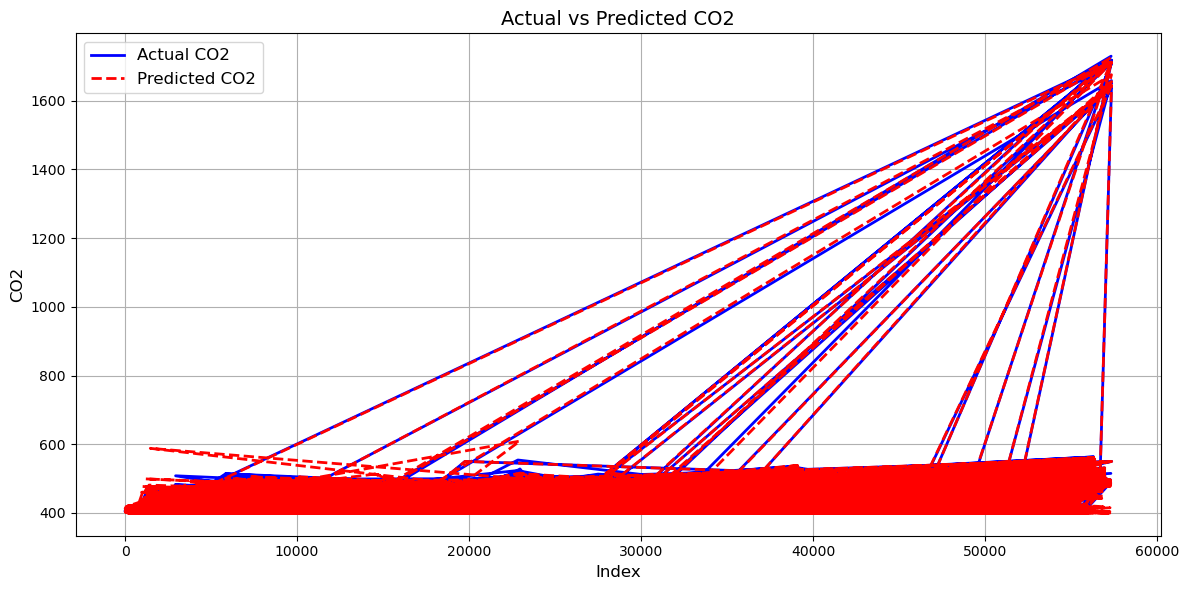

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual CO2", color='b', linewidth=2)
plt.plot(y_test.index, y_pred_future, label="Predicted CO2", color='r', linestyle='--', linewidth=2)

# เพิ่ม labels และ title
plt.xlabel('Index', fontsize=12)
plt.ylabel('CO2', fontsize=12)
plt.title('Actual vs Predicted CO2', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### 19. บันทึก Model และ Scaler

In [ ]:
joblib.dump(dt, "decision_tree_model.pkl")
joblib.dump(scaler, "Scaler.pkl")

['Radom.pkl']

##### ขั้นตอนต่อไปในการพัฒนาโมเดล:
- ใช้ GridSearchCV หรือ RandomizedSearchCV เพื่อปรับค่าพารามิเตอร์ของ Random Forest
- ทดลองใช้ Algorithms อื่น ๆ เช่น XGBoost หรือ Gradient Boosting
- ใช้ Cross-validation เพื่อตรวจสอบความเสถียรของโมเดล
- สร้าง Dashboard สำหรับแสดงผลลัพธ์และ AQI แบบเรียลไทม์